In [1]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Show sample data
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the HTML content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text  # Store in variable named html_data

# Step 2: Parse HTML using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find the Tesla Revenue table
tables = soup.find_all("table")

# Loop through tables to find one with 'Tesla Quarterly Revenue'
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_table = table
        break

# Step 4: Extract rows into DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tesla_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])

# Step 5: Clean the data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Step 6: Show result
print(tesla_revenue.head())

        Date  Revenue
0 2022-09-30    21454
0 2022-06-30    16934
0 2022-03-31    18756
0 2021-12-31    17719
0 2021-09-30    13757


In [5]:
import yfinance as yf

# Step 1: Create ticker object for GameStop
gme = yf.Ticker("GME")

# Step 2: Extract stock data with maximum range
gme_data = gme.history(period="max")

# Step 3: Reset index
gme_data.reset_index(inplace=True)

# Step 4: Display first 5 rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text  # Save HTML text in variable

# Step 2: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Find all tables and locate the GameStop Revenue table
tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_table = table
        break

# Step 4: Extract table rows into a DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in gme_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])

# Step 5: Clean the Revenue column (remove commas, $ and convert to numeric)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]  # Remove empty revenue rows if any
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Step 6: Display last 5 rows
print(gme_revenue.tail())


        Date  Revenue
0 2006-01-31     1667
0 2005-10-31      534
0 2005-07-31      416
0 2005-04-30      475
0 2005-01-31      709


In [10]:
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()

    # Stock Price trace
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'],
                             name=f'{stock_name} Stock Price'))

    # Revenue trace
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'],
                             name=f'{stock_name} Revenue', yaxis='y2'))

    # Create secondary y-axis for revenue
    fig.update_layout(
        title=f"{stock_name} Stock Price and Revenue",
        yaxis=dict(title='Stock Price'),
        yaxis2=dict(title='Revenue', overlaying='y', side='right'),
        xaxis=dict(title='Date'),
        legend=dict(x=0, y=1.2),
        height=600
    )

    fig.show()


In [9]:
def make_graph(stock_data, revenue_data, stock_name):
    ...


In [11]:
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, stock_name):
    # Filter data up to June 2021
    cutoff_date = '2021-06-30'
    stock_data_filtered = stock_data[stock_data['Date'] <= cutoff_date]
    revenue_data_filtered = revenue_data[revenue_data['Date'] <= cutoff_date]

    fig = go.Figure()

    # Add stock price line (Close price)
    fig.add_trace(go.Scatter(
        x=stock_data_filtered['Date'],
        y=stock_data_filtered['Close'],
        name=f'{stock_name} Stock Price',
        line=dict(color='blue')
    ))

    # Add revenue line with secondary y-axis
    fig.add_trace(go.Scatter(
        x=revenue_data_filtered['Date'],
        y=revenue_data_filtered['Revenue'],
        name=f'{stock_name} Revenue',
        yaxis='y2',
        line=dict(color='orange')
    ))

    # Layout with two y-axes
    fig.update_layout(
        title=f"{stock_name} Stock Price and Revenue (Up to June 2021)",
        xaxis=dict(title='Date'),
        yaxis=dict(
            title='Stock Price (USD)',
            showgrid=False,
            zeroline=False
        ),
        yaxis2=dict(
            title='Revenue (USD Millions)',
            overlaying='y',
            side='right',
            showgrid=False,
            zeroline=False
        ),
        legend=dict(x=0.1, y=1.1, orientation='h'),
        height=600,
        margin=dict(t=80)
    )

    fig.show()


In [13]:
import plotly.io as pio
pio.renderers.default = 'colab'  # Set Plotly renderer for Google Colab


In [15]:
def make_graph(stock_data, revenue_data, stock_name):
    import plotly.graph_objects as go

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name=f'{stock_name} Stock Price',
        line=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name=f'{stock_name} Revenue',
        yaxis='y2',
        line=dict(color='orange')
    ))

    fig.update_layout(
        title=f"{stock_name} Stock Price and Revenue",
        xaxis=dict(title='Date'),
        yaxis=dict(title='Stock Price (USD)'),
        yaxis2=dict(title='Revenue (USD Millions)', overlaying='y', side='right'),
        legend=dict(x=0, y=1.1, orientation='h'),
        height=600,
        margin=dict(t=80)
    )

    fig.show()


In [16]:
make_graph(gme_data, gme_revenue, 'GameStop')


In [19]:
#Q5
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, stock_name):
    cutoff_date = '2021-06-30'
    stock_data_filtered = stock_data[stock_data['Date'] <= cutoff_date]
    revenue_data_filtered = revenue_data[revenue_data['Date'] <= cutoff_date]

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_data_filtered['Date'],
        y=stock_data_filtered['Close'],
        name=f'{stock_name} Stock Price',
        line=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=revenue_data_filtered['Date'],
        y=revenue_data_filtered['Revenue'],
        name=f'{stock_name} Revenue',
        yaxis='y2',
        line=dict(color='orange')
    ))

    fig.update_layout(
        title=f"{stock_name} Stock Price and Revenue (Up to June 2021)",
        xaxis=dict(title='Date'),
        yaxis=dict(title='Stock Price (USD)'),
        yaxis2=dict(title='Revenue (USD Millions)', overlaying='y', side='right'),
        legend=dict(x=0, y=1.1, orientation='h'),
        height=600,
        margin=dict(t=80)
    )

    fig.show()


In [20]:
make_graph(gme_data, gme_revenue, 'GameStop')


In [22]:

#Q6
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:red')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:red', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_title(f"{stock_name} Stock Price and Revenue Over Time")

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Revenue', color='tab:blue')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:blue', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()
    plt.show()


In [26]:
print("Tesla Data Columns:", tesla_data.columns)
print("Tesla Revenue Columns:", tesla_revenue.columns)


Tesla Data Columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
Tesla Revenue Columns: Index(['Date', 'Revenue'], dtype='object')


In [27]:
tesla_data = tesla_data.reset_index()  # this moves Date from index to a column


In [28]:
print(tesla_data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [30]:
tesla_data = tesla_data.reset_index()


In [31]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])


In [32]:
cutoff_date = '2021-06-30'

tesla_data_filtered = tesla_data[tesla_data['Date'] <= cutoff_date]
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= cutoff_date]


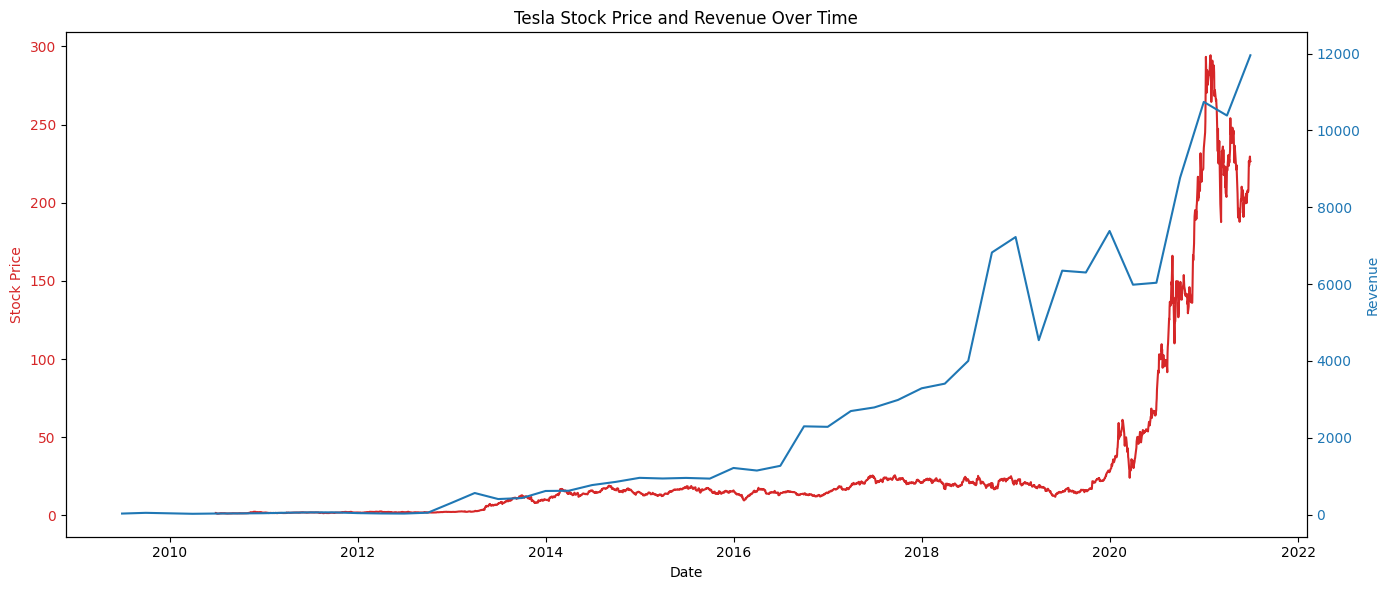

In [33]:
make_graph(tesla_data_filtered, tesla_revenue_filtered, 'Tesla')


In [34]:
#Q4
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Get the webpage
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Find the right table by looking for headers
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break

# Clean the data
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

# Display the last five rows
gme_revenue.tail()


,Date,Revenue
0,2006-01-31,1667.0
0,2005-10-31,534.0
0,2005-07-31,416.0
0,2005-04-30,475.0
0,2005-01-31,709.0
